In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
wine=pd.read_csv("winequality-red.csv")
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
wine.shape

(1599, 12)

In [6]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
wine.info

<bound method DataFrame.info of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067

In [8]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

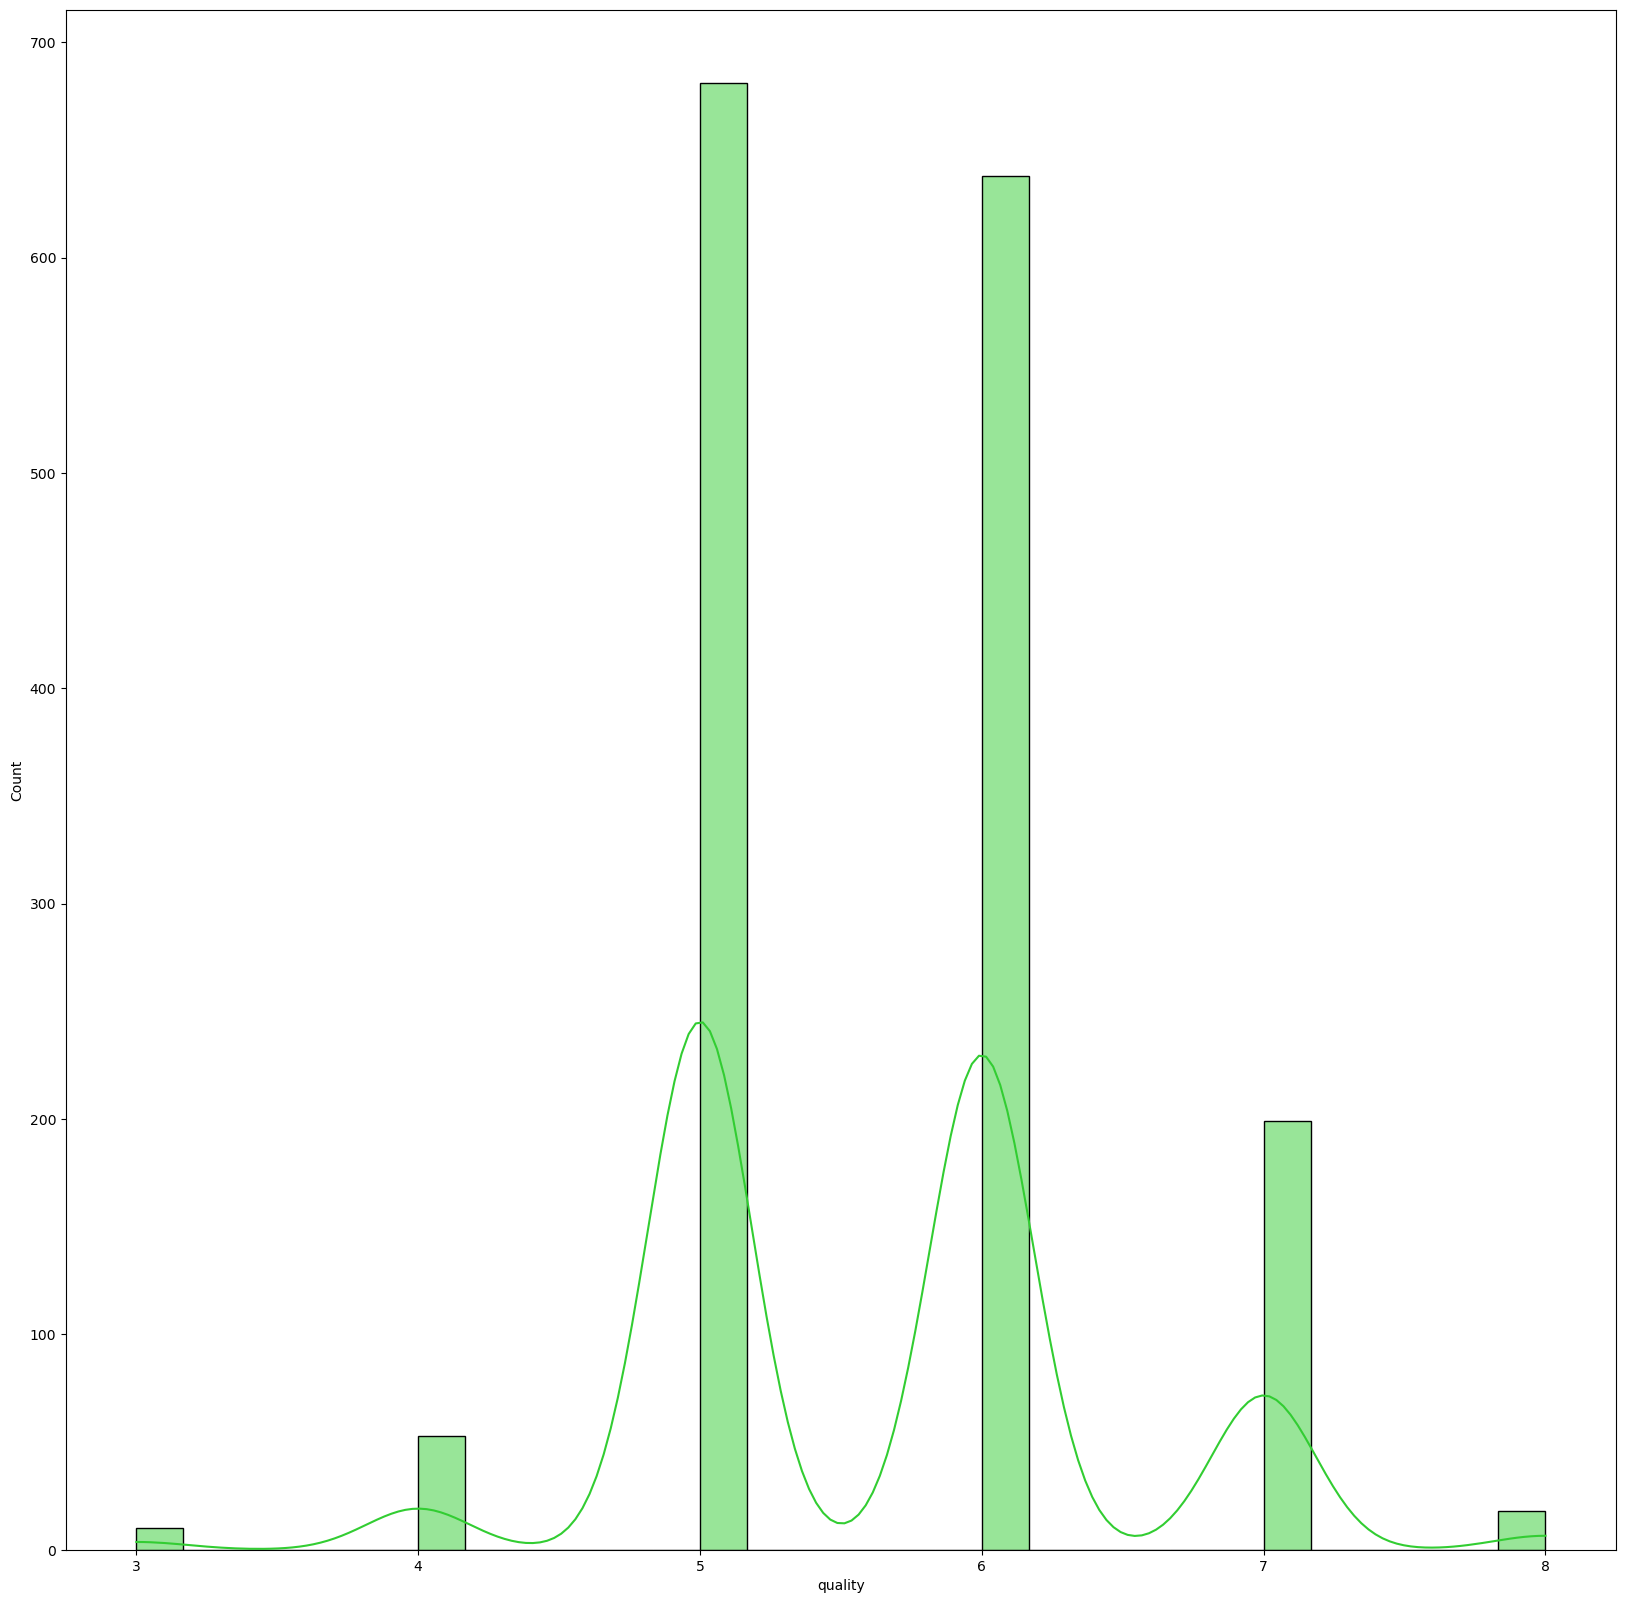

In [84]:
plt.figure(figsize=(20,20))
sns.histplot(x='quality',data=wine,kde='True',color='limegreen')
plt.show()

<Axes: >

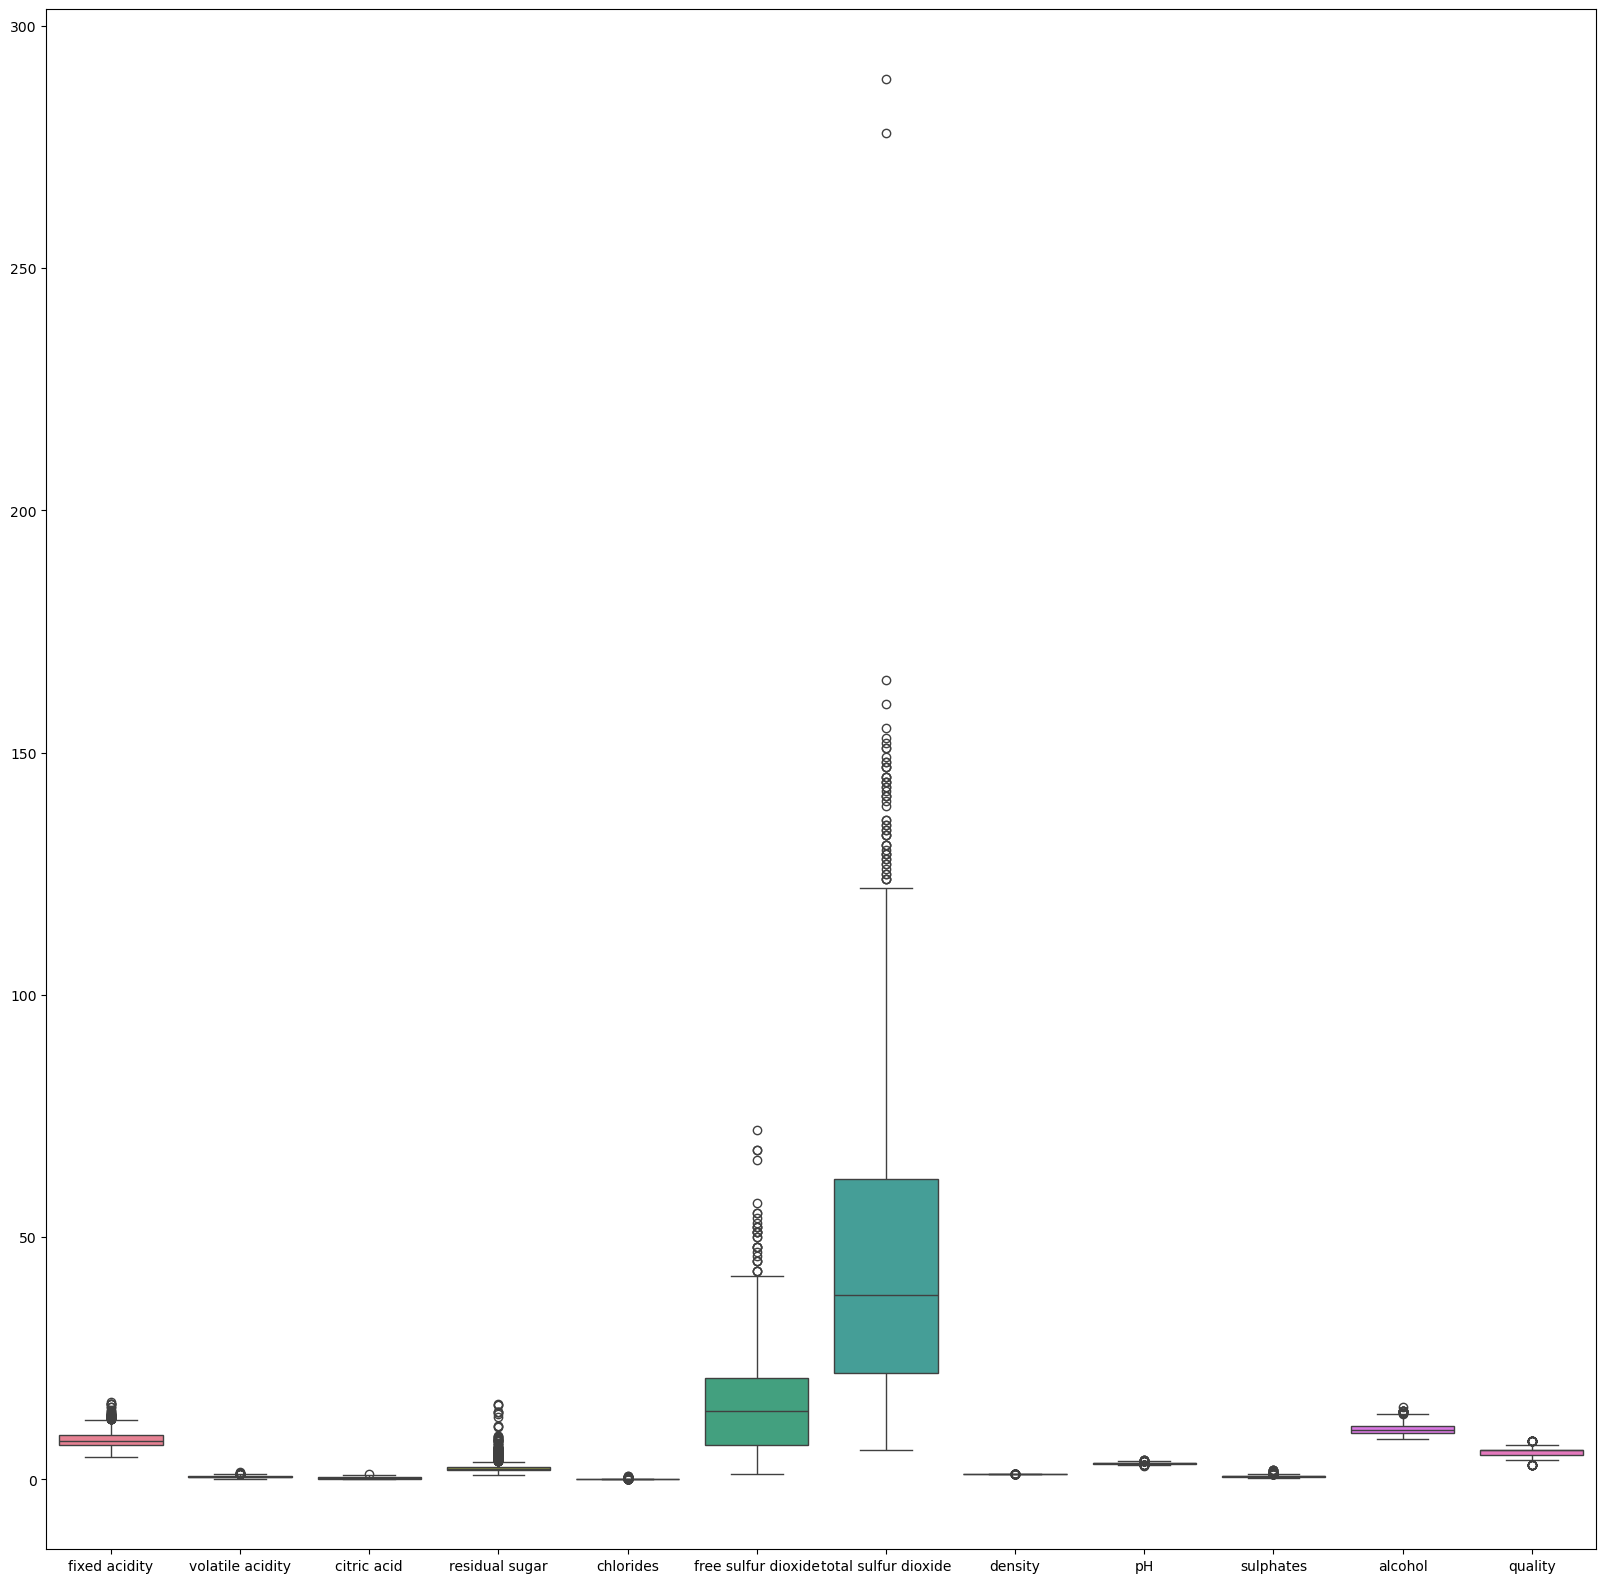

In [9]:
fig,ax=plt.subplots(figsize=(20,20))
sns.boxplot(data=wine,ax=ax)

In [11]:
Q1=wine.quantile(0.25)
Q3=wine.quantile(0.75)

#Calculate the IQR
IQR = Q3-Q1

#Define the outlier boundaries
lower_bound = Q1- 1.5 * IQR
upper_bound = Q3+ 1.5 * IQR

#Create a mask for data within the IQR boundaries
mask = ~((wine < lower_bound) | (wine > upper_bound)).any(axis=1)

#Remove outliers
cleaned_data = wine[mask]

<Axes: >

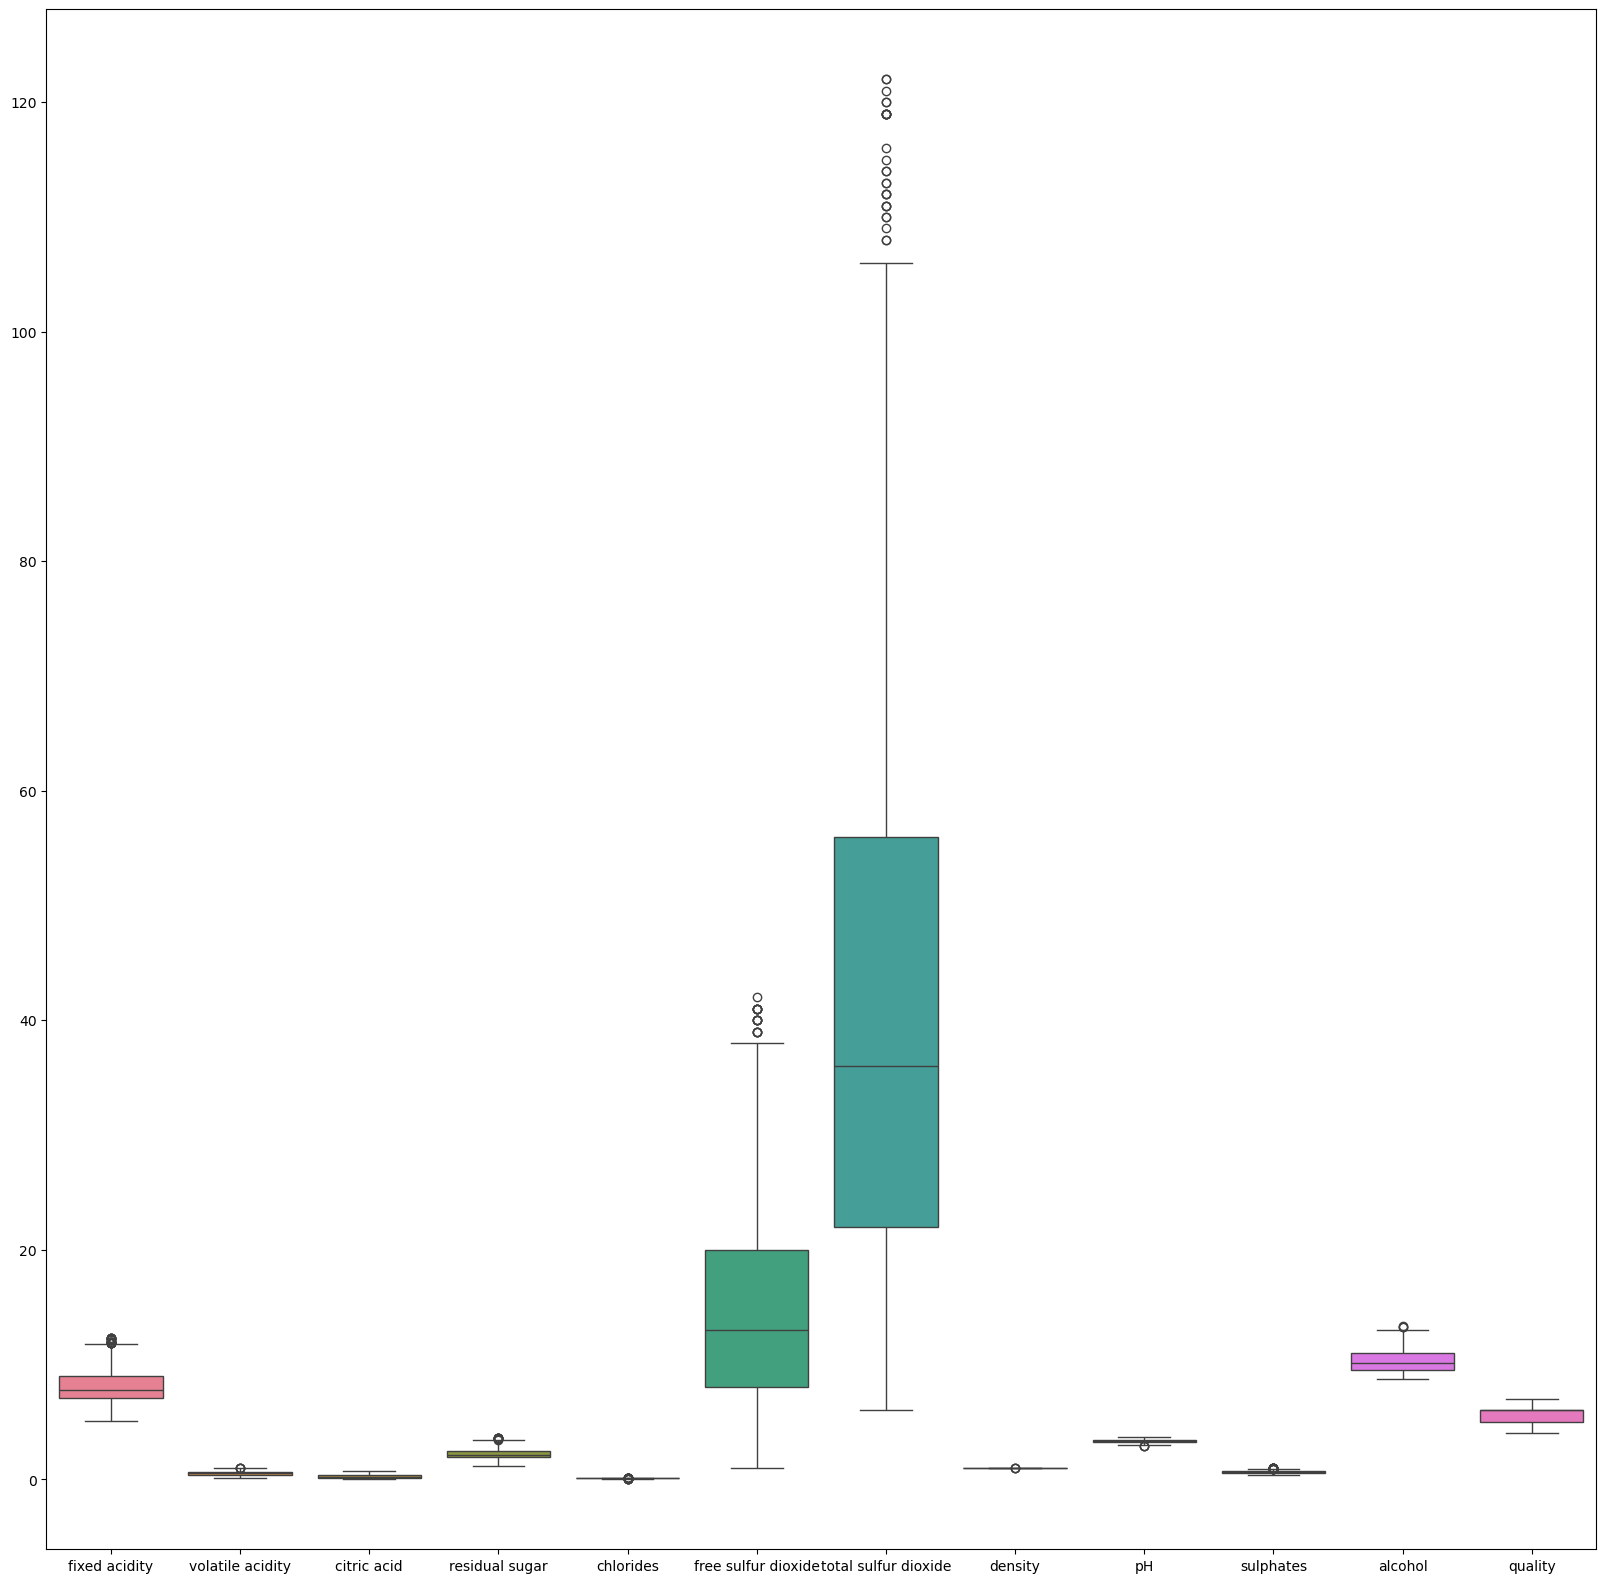

In [12]:
fig,ax=plt.subplots(figsize=(20,20))
sns.boxplot(cleaned_data,ax=ax)

In [13]:
cleaned_data.shape

(1179, 12)

In [14]:
correlation=cleaned_data.corr()
correlation

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.271010,0.659397,0.229653,0.197774,-0.150845,-0.087083,0.610125,-0.684378,0.165367,-0.037999,0.113422
volatile acidity,-0.271010,1.000000,-0.627194,0.035215,0.117805,-0.016718,0.097487,0.044174,0.220702,-0.317346,-0.220600,-0.346962
citric acid,0.659397,-0.627194,1.000000,0.149494,0.073031,-0.068852,0.004660,0.305458,-0.470286,0.256747,0.137762,0.212133
residual sugar,0.229653,0.035215,0.149494,1.000000,0.232752,0.088405,0.199534,0.394732,-0.054684,0.040172,0.098175,0.007934
chlorides,0.197774,0.117805,0.073031,0.232752,1.000000,0.012326,0.176938,0.411902,-0.175758,-0.076853,-0.300750,-0.190869
free sulfur dioxide,-0.150845,-0.016718,-0.068852,0.088405,0.012326,1.000000,0.619675,-0.021505,0.149126,0.107455,-0.022415,-0.003609
total sulfur dioxide,-0.087083,0.097487,0.004660,0.199534,0.176938,0.619675,1.000000,0.149847,0.010031,-0.049655,-0.245125,-0.203374
density,0.610125,0.044174,0.305458,0.394732,0.411902,-0.021505,0.149847,1.000000,-0.227471,0.081691,-0.538901,-0.215375
pH,-0.684378,0.220702,-0.470286,-0.054684,-0.175758,0.149126,0.010031,-0.227471,1.000000,0.013972,0.126747,-0.060288
sulphates,0.165367,-0.317346,0.256747,0.040172,-0.076853,0.107455,-0.049655,0.081691,0.013972,1.000000,0.260783,0.413533


<Axes: >

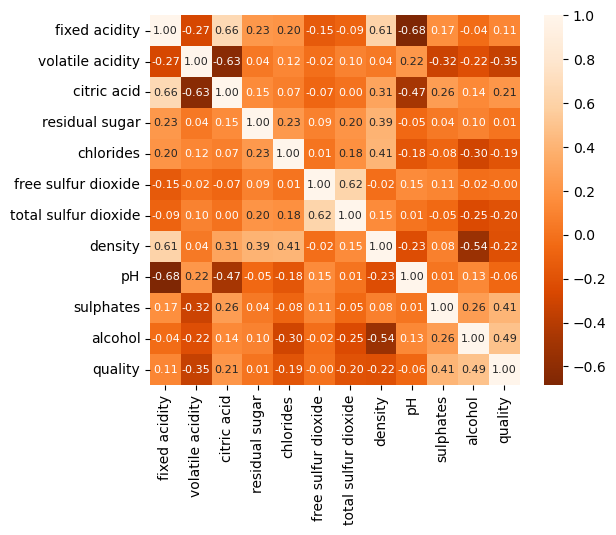

In [15]:
sns.heatmap(correlation,cbar=True,square=True,fmt='.2f',annot=True,annot_kws={'size':8},cmap='Oranges_r')

In [56]:
cleaned_data['quality'].value_counts()

quality
5    513
6    498
7    135
4     33
Name: count, dtype: int64

In [57]:
y=wine['quality']

In [58]:
y = cleaned_data['quality']
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1179, dtype: int64

In [59]:
y.value_counts()

quality
5    513
6    498
7    135
4     33
Name: count, dtype: int64

In [60]:
from imblearn.over_sampling import SMOTE

In [61]:
y= cleaned_data['quality'].apply (lambda y_value: 1 if y_value>=7 else 0)

In [62]:
x = cleaned_data.drop('quality', axis=1)

<Axes: xlabel='quality', ylabel='count'>

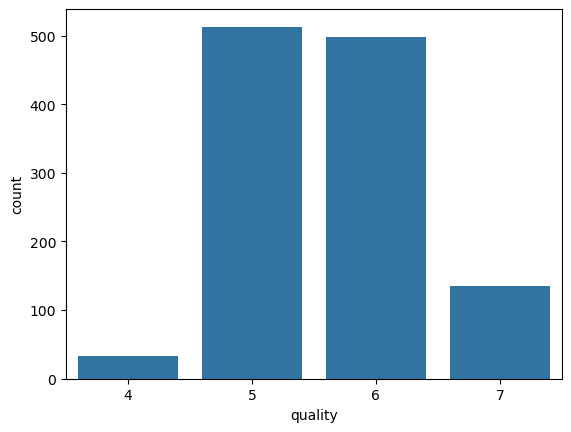

In [63]:
sns.countplot(x='quality',data=cleaned_data)

In [64]:
smote=SMOTE()
x_resampled,y_resampled=smote.fit_resample(x,y)

In [65]:
x_resampled.shape

(2088, 11)

In [66]:
x.shape

(1179, 11)

In [67]:
x_train,x_test,y_train,y_test=train_test_split(x_resampled,y_resampled,test_size=0.3,random_state=42)

In [68]:
x_resampled.shape,x_train.shape,x_test.shape,y_resampled.shape,y_test.shape,y_train.shape

((2088, 11), (1461, 11), (627, 11), (2088,), (627,), (1461,))

In [69]:
model=RandomForestClassifier()

In [70]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [71]:
training_data_predict=model.predict(x_train)
training_data_accuracy=accuracy_score(training_data_predict,y_train)
print("accuracy of training data:",training_data_accuracy)

accuracy of training data: 1.0


In [72]:
testing_data_predict=model.predict(x_test)
testing_data_accuracy=accuracy_score(testing_data_predict,y_test)
print("accuracy of testing data:",testing_data_accuracy)

accuracy of testing data: 0.9425837320574163


In [73]:
cm=confusion_matrix(testing_data_predict,y_test)
cm

array([[293,   9],
       [ 27, 298]], dtype=int64)

Text(0.5, 1.0, 'confusion_matrix')

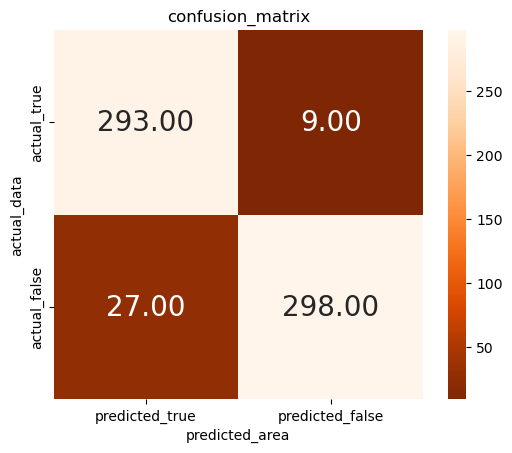

In [74]:
sns.heatmap(cm,annot=True,annot_kws={'size':20},fmt='.2f',cmap='Oranges_r',square=True,
            xticklabels=['predicted_true','predicted_false'],
            yticklabels=['actual_true','actual_false'])
plt.xlabel('predicted_area')
plt.ylabel('actual_data')
plt.title('confusion_matrix')

In [75]:
print(classification_report(testing_data_predict,y_test))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       302
           1       0.97      0.92      0.94       325

    accuracy                           0.94       627
   macro avg       0.94      0.94      0.94       627
weighted avg       0.94      0.94      0.94       627



In [76]:
input_data=(7.4,	0.700,	0.00,	1.9,	0.076,	11.0,	34.0,	0.99780,	3.51,	0.56,	9.4)
input_data_as_np=np.array(input_data)
input_data_reshaped=input_data_as_np.reshape(1,-1)
prediction=model.predict(input_data_reshaped)
if prediction[0]==0:
    print('wine quality is not good')
else:
    print('wine quality is good')

wine quality is not good


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [79]:
input_data=(10.7,	0.35,	0.53,	2.6,	0.070,	5.0,	16.0,	0.9972,	3.15,	0.65,	11.0)
input_data_as_np=np.array(input_data)
input_data_reshaped=input_data_as_np.reshape(1,-1)
prediction=model.predict(input_data_reshaped)
if prediction[0]==0:
    print('wine quality is not good')
else:
    print('wine quality is good')

wine quality is good


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
